In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
from random import randint
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
os.chdir('C:\\Users\\Antonio\\Desktop\\KAGGLE MEETUP\\CareerCon')

In [2]:
feats = pd.read_csv('feats.csv')
test_feats = pd.read_csv('test_feats.csv')
Y = pd.read_csv('Y.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feats.iloc[:,1:], Y['surf_code'], test_size=0.25, random_state=42)

# Trying out a few models from sklearn to check preliminary scores

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC

classifiers = [
   KNeighborsClassifier(3),
   SVC(probability=True),
   DecisionTreeClassifier(),
   RandomForestClassifier(),
   AdaBoostClassifier(),
   GradientBoostingClassifier(),
   GaussianNB(),
   LinearDiscriminantAnalysis(),
   QuadraticDiscriminantAnalysis(),
   LogisticRegression(),
   MLPClassifier(alpha=1),
   LinearSVC()]

In [8]:
acc_dict = {}
acc_dict_train = {}
tab_dict = {}

for clf in classifiers:
   name = clf.__class__.__name__
   #print(name)
   clf.fit(X_train, y_train)
   acc_train = np.mean(cross_val_score(clf, X_train, y_train, cv=10))
   acc_test = np.mean(cross_val_score(clf, X_test, y_test, cv=10))
   #print('Accuracy on training set: {:.2f}'.format(acc_train))
   #print('Accuracy on test set: {:.2f}'.format(acc_test))
   #update dict for plot
   if name in acc_dict:
       acc_dict[name] += acc_test
   else:
       acc_dict[name] = acc_test
   if name in acc_dict_train:
       acc_dict_train[name] += acc_train
   else:
       acc_dict_train[name] = acc_train
   #update dict for table
   tab_dict[name] = [round(acc_train,4), round(acc_test,4)]

# table
table = pd.DataFrame.from_dict(tab_dict,orient='index',columns=['On training set', 'On testing set'])
print(table)

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\li

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\li

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\li

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

                               On training set  On testing set
KNeighborsClassifier                    0.3019          0.2476
SVC                                     0.2257          0.2307
DecisionTreeClassifier                  0.8049          0.7286
RandomForestClassifier                  0.8778          0.7814
AdaBoostClassifier                      0.3126          0.3269
GradientBoostingClassifier              0.8856          0.8174
GaussianNB                              0.4051          0.3946
LinearDiscriminantAnalysis              0.6079          0.5735
QuadraticDiscriminantAnalysis           0.5162          0.4191
LogisticRegression                      0.5306          0.5415
MLPClassifier                           0.4299          0.4032
LinearSVC                               0.2819          0.2535


C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


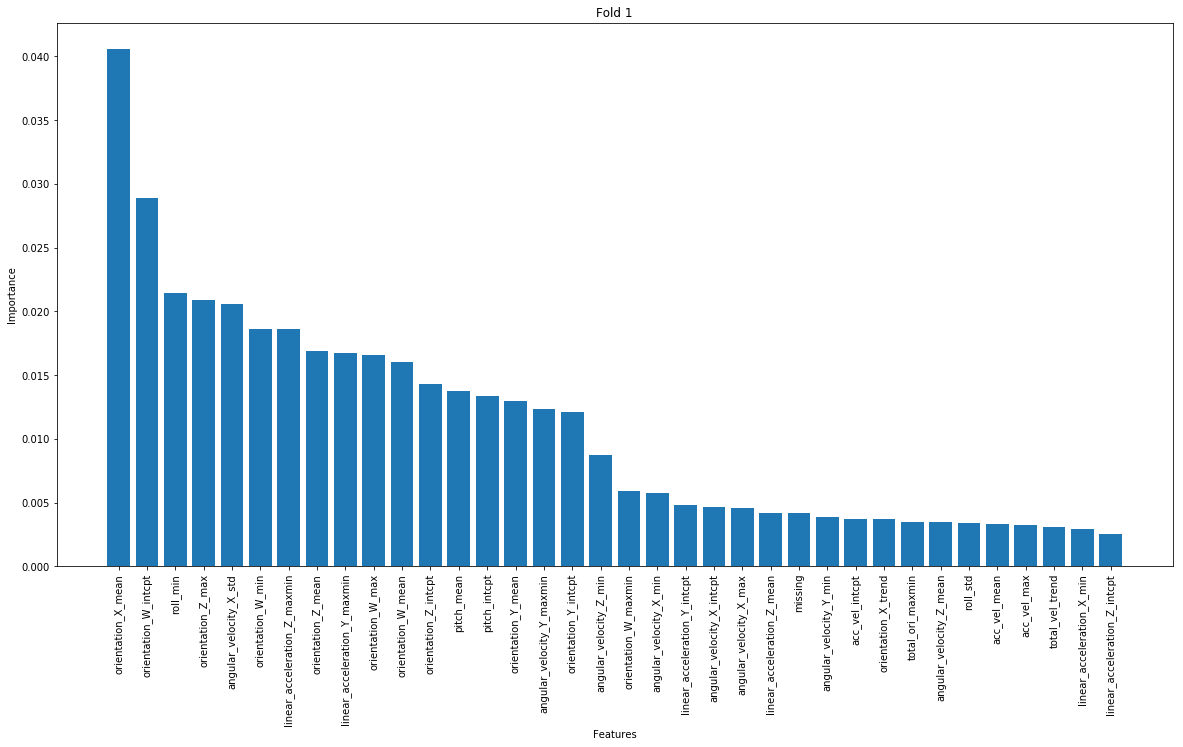

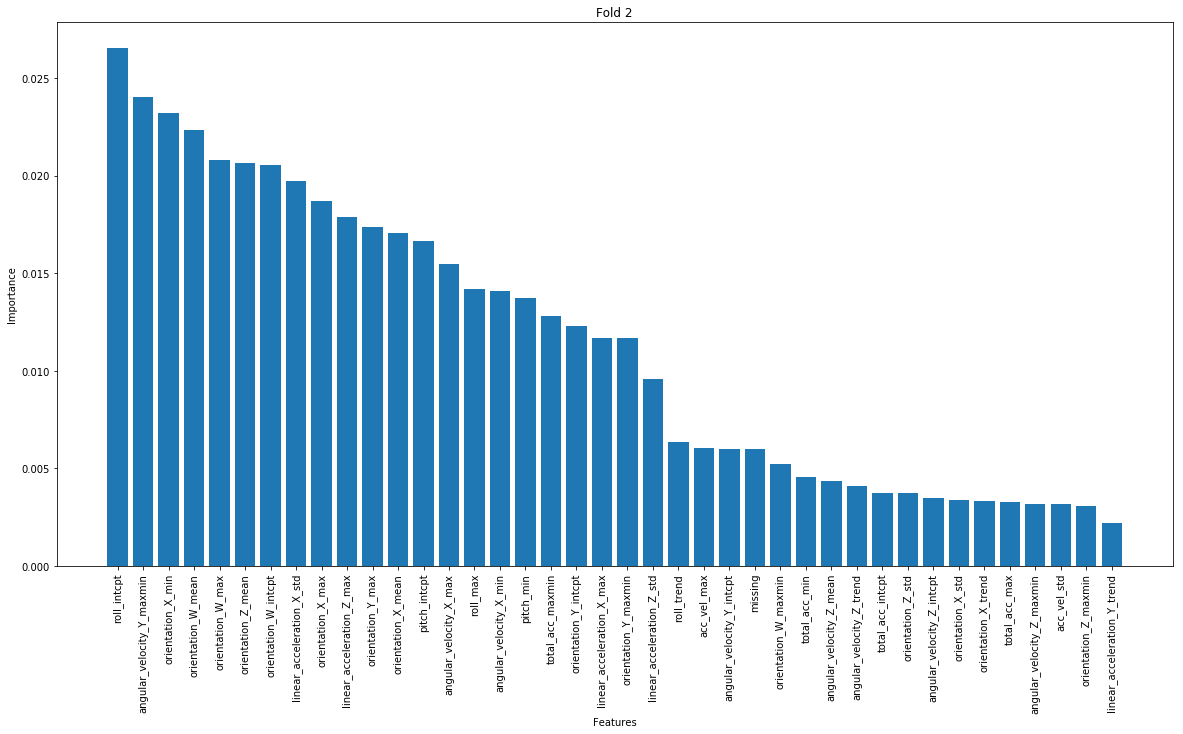

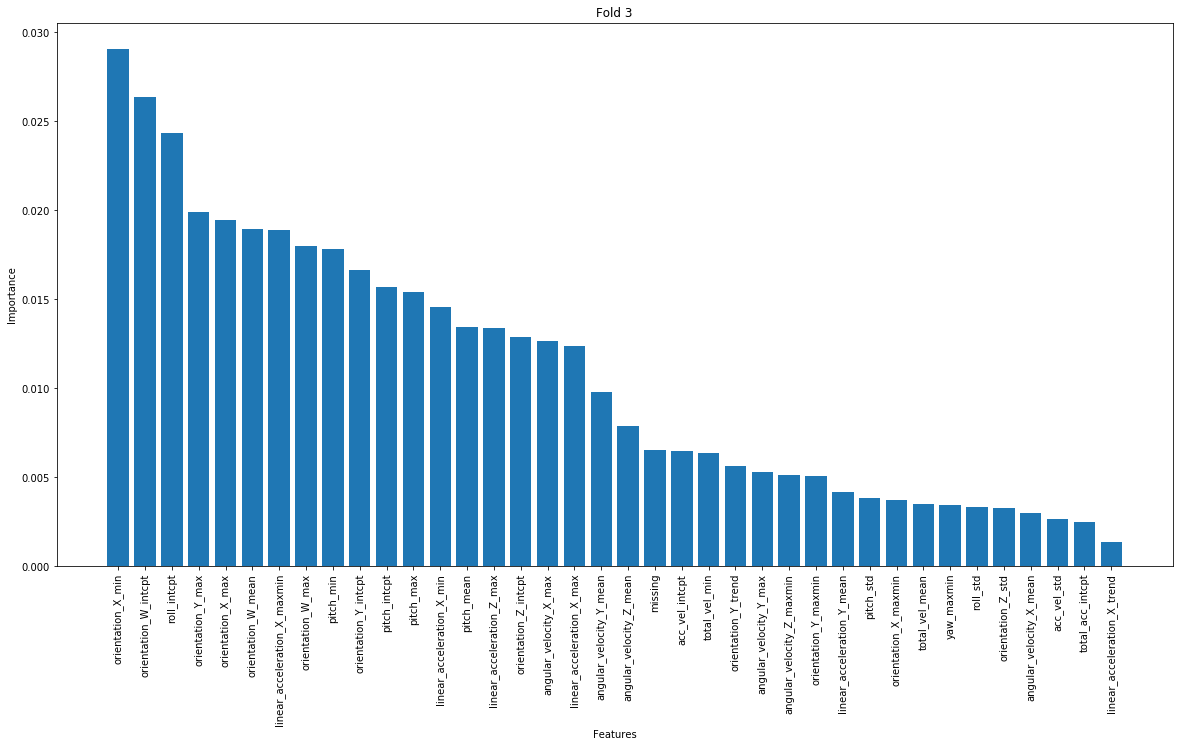

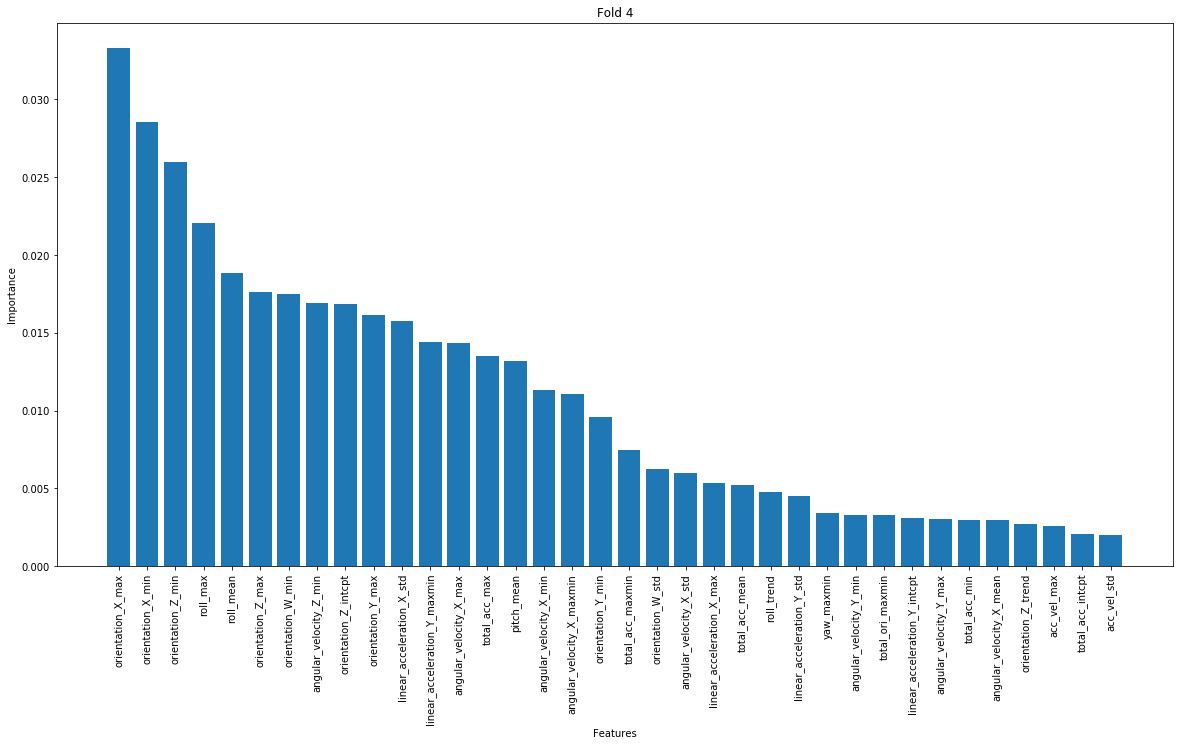

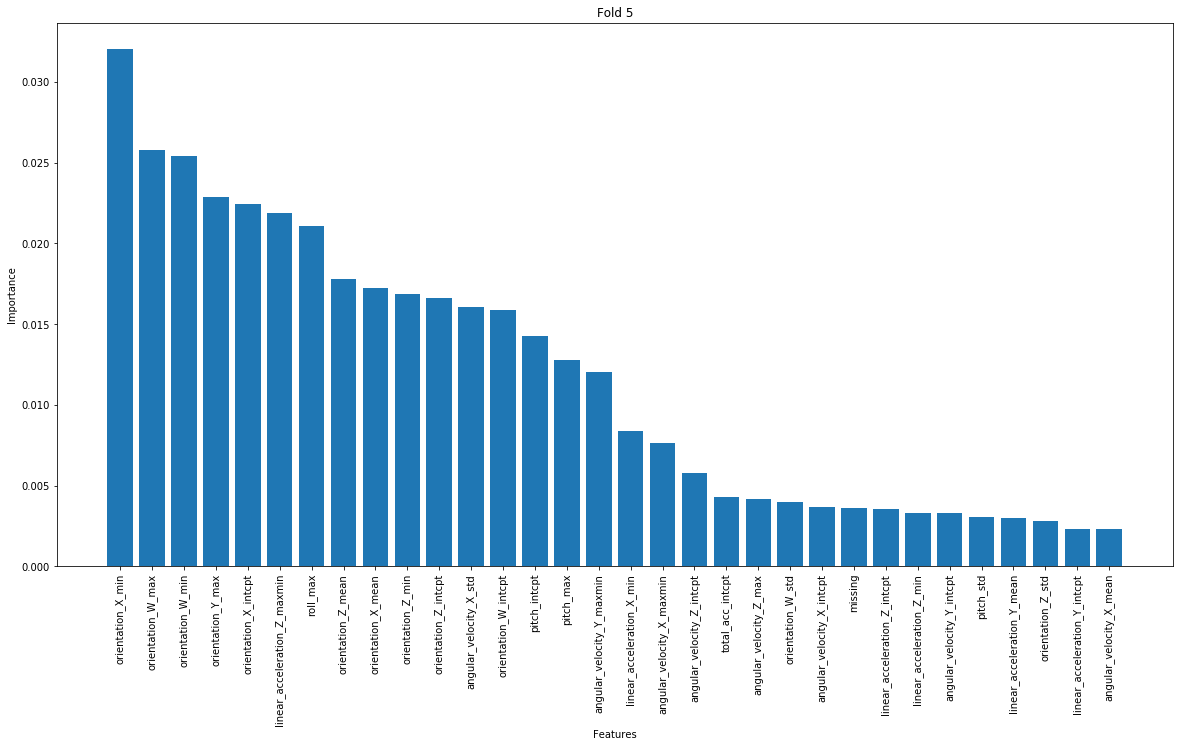

In [6]:
kf = KFold(n_splits=5)
rfc = RandomForestClassifier()
count = 1

for train, _ in kf.split(X_train, y_train):
    rfc.fit(X_train, y_train)
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rfc.feature_importances_)[::-1]
    importances_index_desc = importances_index_desc[rfc.feature_importances_ > 0.01]
    feature_labels = [X_train.columns[i] for i in importances_index_desc]
    # plot only top 50 features
    plt.figure(figsize=(20,10))
    plt.bar(feature_labels, rfc.feature_importances_[importances_index_desc])
    plt.xticks(feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

 - after plotting some feature importance charts, we realize trends aren't that important, intercepts may be useful and means, maxs, mins, stds are important. We will keep only features with higher importance score

In [7]:
feats = pd.concat([feats.series_id, feats.iloc[:,importances_index_desc]], axis=1)
test_feats = pd.concat([test_feats.series_id, test_feats.iloc[:,importances_index_desc]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats.iloc[:,1:], Y['surf_code'], test_size=0.25, random_state=42)

# Make XGboost classifier

In [70]:
from xgboost import XGBClassifier

weight = {1:0.12,
         2:0.11,
         3:0.11,
         4:0.11,
         5:0.11,
         6:0.11,
         7:0.11,
         8:0.11,
         9:0.11}

xgb = XGBClassifier(base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.4,
                    gamma=0,
                    learning_rate=0.01,
                    max_delta_step=0,
                    max_depth=10,
                    min_child_weight=3,
                    missing=None,
                    n_estimators=500,
                    nthread=-1,
                    objective='multi:softmax',
                    num_class=9,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=weight,
                    seed=None,
                    silent=True,
                    subsample=0.8)

In [72]:
%time print (np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

0.8862834403938933
Wall time: 7min 44s


In [79]:
%time xgb.fit(feats.iloc[:,1:], Y.surf_code)
preds = xgb.predict(test_feats.iloc[:,1:])

Wall time: 1min 40s


In [80]:
preds_sub = pd.Series(preds).map({9:'concrete',
                                  8:'soft_pvc',
                                  7:'wood',
                                  6:'tiled',
                                  5:'fine_concrete',
                                  4:'hard_tiles_large_space',
                                  3:'soft_tiles',
                                  2:'carpet',
                                  1:'hard_tiles'}).astype(object)

sampsub=pd.read_csv('sample_submission.csv')

output = sampsub.copy(deep=True)
output["surface"] = preds_sub
output.head()

,series_id,surface
0,0,fine_concrete
1,1,concrete
2,2,tiled
3,3,carpet
4,4,soft_tiles


In [81]:
output.to_csv('xgb_extra_feats_sub.csv', index=False)

# Try same features but with RF

In [82]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=20,
                             max_features='auto',
                             min_samples_split=2,
                             min_samples_leaf=2,
                             bootstrap=True,
                             n_jobs=-1,
                             class_weight="balanced")

%time clf.fit(feats.iloc[:,1:], Y.surf_code)

Wall time: 15.3 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [83]:
preds=clf.predict(test_feats.iloc[:,1:])

In [84]:
preds_sub = pd.Series(preds).map({9:'concrete',
                                  8:'soft_pvc',
                                  7:'wood',
                                  6:'tiled',
                                  5:'fine_concrete',
                                  4:'hard_tiles_large_space',
                                  3:'soft_tiles',
                                  2:'carpet',
                                  1:'hard_tiles'}).astype(object)

sampsub=pd.read_csv('sample_submission.csv')

output = sampsub.copy(deep=True)
output["surface"] = preds_sub

In [85]:
output.to_csv('bal_rf_extra_feats_sub.csv', index=False)

# Try with all features

In [86]:
feats = pd.read_csv('feats.csv')
test_feats = pd.read_csv('test_feats.csv')
Y = pd.read_csv('Y.csv')

In [87]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=20,
                             max_features='auto',
                             min_samples_split=2,
                             min_samples_leaf=2,
                             bootstrap=True,
                             n_jobs=-1,
                             class_weight="balanced")

%time clf.fit(feats.iloc[:,1:], Y.surf_code)

Wall time: 27.7 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [88]:
preds=clf.predict(test_feats.iloc[:,1:])

In [89]:
preds_sub = pd.Series(preds).map({9:'concrete',
                                  8:'soft_pvc',
                                  7:'wood',
                                  6:'tiled',
                                  5:'fine_concrete',
                                  4:'hard_tiles_large_space',
                                  3:'soft_tiles',
                                  2:'carpet',
                                  1:'hard_tiles'}).astype(object)

sampsub=pd.read_csv('sample_submission.csv')

output = sampsub.copy(deep=True)
output["surface"] = preds_sub

In [90]:
output.to_csv('bal_rf_extra_feats_sub_all_feats.csv', index=False)

# Try a specific model to detect `hard_tiles`

In [11]:
Y.surface.value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

In [8]:
Y.hard_tiles = (Y.surf_code==1)*1

C:\Users\Antonio\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


 - apply SMOTE to generate more entries for `hard_tiles`

In [14]:
names = feats.columns
normalized_feats = preprocessing.normalize(feats)
feats = pd.DataFrame(normalized_feats, columns=names)

X_train, X_test, y_train, y_test = train_test_split(feats, Y.hard_tiles, random_state=0, test_size=0.25)

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio=0.25, random_state=10)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=feats.columns)

In [77]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score

acc_dict = {}
acc_dict_train = {}
tab_dict = {}

for clf in classifiers:
   name = clf.__class__.__name__
   #print(name)
   clf.fit(X_train_res.iloc[:,1:], y_train_res)
   acc_train = recall_score(clf.predict(X_test.iloc[:,1:]), y_test)
   acc_test = precision_score(clf.predict(X_test.iloc[:,1:]), y_test)
   #print('Recall: {:.2f}'.format(acc_train))
   #print('F-Beta score: {:.2f}'.format(acc_test))
   #update dict for plot
   if name in acc_dict:
       acc_dict[name] += acc_test
   else:
       acc_dict[name] = acc_test
   if name in acc_dict_train:
       acc_dict_train[name] += acc_train
   else:
       acc_dict_train[name] = acc_train
   #update dict for table
   tab_dict[name] = [round(acc_train,4), round(acc_test,4)]

# table
table = pd.DataFrame.from_dict(tab_dict,orient='index',columns=['Recall', 'Precision'])
print(table)

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are co

                               Recall  Precision
KNeighborsClassifier           0.1739     0.5714
SVC                            0.0000     0.0000
DecisionTreeClassifier         0.0000     0.0000
RandomForestClassifier         0.2500     0.1429
AdaBoostClassifier             0.2222     0.2857
GradientBoostingClassifier     0.3333     0.4286
GaussianNB                     0.0095     0.7143
LinearDiscriminantAnalysis     0.0000     0.0000
QuadraticDiscriminantAnalysis  0.0000     0.0000
LogisticRegression             0.0000     0.0000
MLPClassifier                  0.0000     0.0000
LinearSVC                      0.0000     0.0000


C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [78]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5,
                    colsample_bylevel=0.6,
                    colsample_bytree=0.8,
                    gamma=0,
                    max_delta_step=1,
                    max_depth=10,
                    min_child_weight=4,
                    n_estimators=500,
                    nthread=-1,
                    objective='binary:logistic',
                    reg_alpha=0,
                    reg_lambda=0,
                    silent=True,
                    subsample=0.8)

In [79]:
%time xgb.fit(X_train_res.iloc[:,1:], y_train_res)
preds = xgb.predict(X_test.iloc[:,1:])

Wall time: 4.03 s


In [80]:
recall_score(preds, y_test)

0.2

In [81]:
precision_score(preds, y_test)

0.14285714285714285

 - try GBM to obtain `hard_tiles` predictions

In [99]:
gbm=GradientBoostingClassifier(max_features='sqrt',
                    max_depth=8,
                    learning_rate=0.008,
                    n_estimators=1000)

In [100]:
%time gbm.fit(X_train_res.iloc[:,1:], y_train_res)
preds = gbm.predict(X_test.iloc[:,1:])

Wall time: 8.7 s


In [101]:
recall_score(preds, y_test)

0.6666666666666666

In [102]:
precision_score(preds, y_test)

0.2857142857142857

In [113]:
probs = pd.Series(gbm.predict_proba(X_test.iloc[:,1:])[:,1])

In [118]:
((probs>0.1)*1).sum()

12